In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import driver


In [3]:
foundation_breakdown = {
    'ecosystem': 100_000_000,
    'community_infra': 50_000_000,
    'fundraising': 77_000_000,
    'investments': 30_000_000,
    'research': 50_000_000,
}
# of these categories, ecosystem, community_infra, investments, and research are considered
# to be part of the community supply.
# so when we compute the percentage of the total supply for each emission type, we need to
# we take this into acocunt.  since the foundation is vested, 
# we assume all of these components vest at the same rate so we compute percentages.
foundation_to_community_pct = (
    foundation_breakdown['ecosystem'] + 
    foundation_breakdown['community_infra'] + 
    foundation_breakdown['investments'] + 
    foundation_breakdown['research']
) / sum(foundation_breakdown.values())
foundation_remaining_pct = 1 - foundation_to_community_pct


In [4]:
emissions_start = 5_000_000
emissions_end = 500_000
emissions_total_target = 138_000_000
# emissions_total_target = 125_000_000
subnet_maintenance_fee_pct = 0.20

In [5]:
df_baseline = driver.sim2(
    ent_arrival_rate=100.0,  # average new entities per month
    ent_lifetime_months=24,  # entities depart after this many months
    subnet_lifetime_months=36,  # subnets depart after this many months
    initial_subnet_revenue=0,  # $100k initial revenue per subnet per month
    max_subnet_revenue=100000,  # $1M max revenue per subnet per month
    revenue_growth_months=48,  # months to reach max revenue
    revenue_burn_pct=0.5,  
    initial_token_price=0.30,  # $0.30 initial token price
    annual_price_growth_rate=0.0,  # 1% annual growth rate
    initial_target_staking_apy=0.08,  # 8% initial target staking APY
    final_target_staking_apy=0.04,  # 4% final target staking APY
    staking_apy_transition_months=48,  # months to transition from initial to final APY
    linear_start_emission=emissions_start,
    linear_end_emission=emissions_end,
    linear_total_emissions=emissions_total_target,
    dynamic_staking_fees=False,
    airdrop_allocation=50_000_000,  # 50M airdrop allocation
    community_round_allocation=23_000_000,  # 23M community round allocation
    subnet_maintenance_fee_pct=subnet_maintenance_fee_pct,
)

df_revenue_decrease = driver.sim2(
    ent_arrival_rate=100.0,  # average new entities per month
    ent_lifetime_months=24,  # entities depart after this many months
    subnet_lifetime_months=36,  # subnets depart after this many months
    initial_subnet_revenue=0,  # $100k initial revenue per subnet per month
    max_subnet_revenue=50000,  # $1M max revenue per subnet per month
    revenue_growth_months=48,  # months to reach max revenue
    revenue_burn_pct=0.5,  
    initial_token_price=0.30,  # $0.30 initial token price
    annual_price_growth_rate=0.0,  # 5% annual decrease
    initial_target_staking_apy=0.08,  # 8% initial target staking APY
    final_target_staking_apy=0.04,  # 4% final target staking APY
    staking_apy_transition_months=48,  # months to transition from initial to final APY
    linear_start_emission=emissions_start,
    linear_end_emission=emissions_end,
    linear_total_emissions=emissions_total_target,
    dynamic_staking_fees=False,
    airdrop_allocation=50_000_000,  # 50M airdrop allocation
    community_round_allocation=23_000_000,  # 23M community round allocation
    subnet_maintenance_fee_pct=subnet_maintenance_fee_pct,
)

df_revenue_increase = driver.sim2(
    ent_arrival_rate=100.0,  # average new entities per month
    ent_lifetime_months=24,  # entities depart after this many months
    subnet_lifetime_months=36,  # subnets depart after this many months
    initial_subnet_revenue=0,  # $100k initial revenue per subnet per month
    max_subnet_revenue=200000,  # $1M max revenue per subnet per month
    revenue_growth_months=48,  # months to reach max revenue
    revenue_burn_pct=0.5,  
    initial_token_price=0.30,  # $0.30 initial token price
    annual_price_growth_rate=0.0,  # 1% annual growth rate
    initial_target_staking_apy=0.08,  # 8% initial target staking APY
    final_target_staking_apy=0.04,  # 4% final target staking APY
    staking_apy_transition_months=48,  # months to transition from initial to final APY
    linear_start_emission=emissions_start,
    linear_end_emission=emissions_end,
    linear_total_emissions=emissions_total_target,
    dynamic_staking_fees=False,
    airdrop_allocation=50_000_000,  # 50M airdrop allocation
    community_round_allocation=23_000_000,  # 23M community round allocation
    subnet_maintenance_fee_pct=subnet_maintenance_fee_pct,
)


5227272.7272727275 522727.2727272727
5227272.7272727275 522727.2727272727
5227272.7272727275 522727.2727272727


In [14]:
(522727.2727272727-5227272.7272727275)/47

-100096.71179883947

In [15]:
4/47

0.0851063829787234

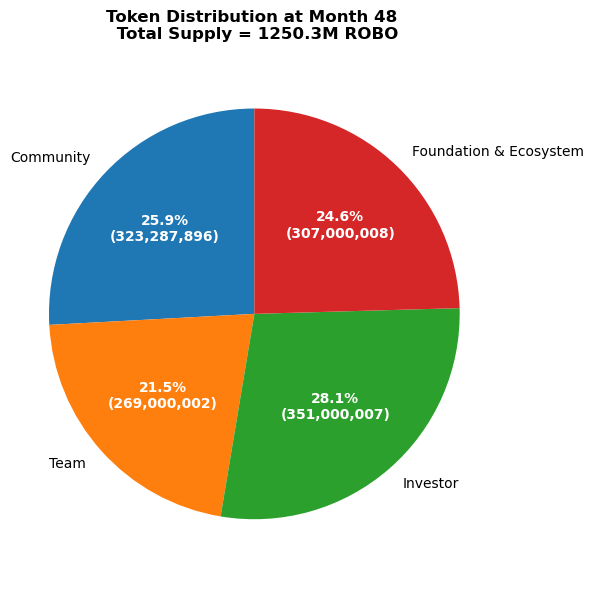

In [6]:
# df_baseline.iloc[48]['cumulative_emissions']/1e6
# plt.plot(df_baseline['month'], df_baseline['cumulative_emissions']/1e6)
# plt.axvline(x=48, color='red', linestyle='--')
dff = df_baseline
total_supply = dff['team_vested'] + dff['investor_vested'] + dff['foundation_vested'] + dff['cumulative_emissions']
foundation_actual = dff['foundation_vested'] * foundation_remaining_pct
foundation_to_community = dff['foundation_vested'] * foundation_to_community_pct

mo = 48
# community = (dff['cumulative_emissions'].iloc[mo] + foundation_to_community.iloc[mo])
community = dff['cumulative_emissions'].iloc[mo] + dff['airdrop_vested'].iloc[mo] + dff['community_round_vested'].iloc[mo]
team = dff['team_vested'].iloc[mo]
investor = dff['investor_vested'].iloc[mo]
foundation = dff['foundation_vested'].iloc[mo]
total= community + team + investor + foundation
# make a pie chart of this at month 48
# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Community', 'Team', 'Investor', 'Foundation & Ecosystem']
sizes = [community, team, investor, foundation]
# colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels,
                                   autopct=make_autopct(sizes), startangle=90)

# Customize the text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add title
emissions_total_48 = dff['cumulative_emissions'].iloc[mo]

# ax.set_title(f'Token Distribution at Month {mo}: Total Supply = {total/1e6:.1f}M \n (Rewards + Staking Emissions + Airdrop + Community Round) = {emissions_total_48/1e6:.1f}M', fontweight='bold')
ax.set_title(f'Token Distribution at Month {mo} \n Total Supply = {total/1e6:.1f}M ROBO', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.tight_layout()


In [7]:
def plot_simulation_comparison(dataframes_dict, foundation_remaining_pct=0.5, foundation_to_community_pct=0.5):
    """
    Plot comparison of multiple simulation runs.
    
    Parameters:
    -----------
    dataframes_dict : dict
        Dictionary where keys are configuration labels (strings) and values are dataframes
        Example: {"Config A": df1, "Config B": df2, "Conservative": df3}
    foundation_remaining_pct : float
        Percentage of foundation tokens remaining (default 0.5)
    foundation_to_community_pct : float  
        Percentage of foundation tokens going to community (default 0.5)
    """
    
    # Create color map for different configurations
    cmap = plt.cm.get_cmap('tab10')
    colors = cmap.colors
    
    fig, ax = plt.subplots(figsize=(12, 11), nrows=3, ncols=3)
    
    # Iterate through each configuration
    for i, (config_label, df) in enumerate(dataframes_dict.items()):
        color = colors[i]
        
        # Plot 1: Community Portion of Supply
        axx = ax[0, 0]
        total_supply = df['team_vested'] + df['investor_vested'] + df['foundation_vested'] + df['cumulative_emissions']
        foundation_actual = df['foundation_vested'] * foundation_remaining_pct
        foundation_to_community = df['foundation_vested'] * foundation_to_community_pct
        community_pct = (df['cumulative_emissions'] + foundation_to_community) / total_supply
        axx.plot(df['month'], community_pct*100, color=color, label=config_label)
        
        # Plot 2: Circulating Supply
        axx = ax[0, 1]
        axx.plot(df['month'], df['circulating_supply']/1e6, color=color, label=config_label)
        
        # Plot 3: Locked Supply
        axx = ax[0, 2]
        axx.plot(df['month'], df['total_locked_supply']/1e6, color=color, label=config_label)
        
        # Plot 4: Locked/Circulating Percentage
        axx = ax[1, 0]
        axx.plot(df['month'], df['total_locked_supply']/df['circulating_supply']*100, color=color, label=config_label)
        
        # Plot 5: Inflation Rate
        axx = ax[1, 1]
        axx.plot(df['month'], df['total_emissions']/df['circulating_supply'].shift(1)*100, color=color, label=config_label)
        
        # Plot 6: Burn/Emissions Percentage
        axx = ax[1, 2]
        axx.plot(df['month'], df['cumulative_burn']/df['cumulative_emissions']*100, color=color, label=config_label)
        
        # Plot 7: Subnet Reward Emissions
        axx = ax[2, 0]
        axx.plot(df['month'], df['base_emissions']/1e6, color=color, label=config_label)
        
        # Plot 8: Staking Emissions
        axx = ax[2, 1]
        axx.plot(df['month'], df['additional_staking_emissions']/1e6, color=color, label=config_label)
        
        # Plot 9: Average Subnet Reward per Month
        axx = ax[2, 2]
        axx.plot(df['month'], (df['base_emissions']/1e6)/df['active_subnets'], color=color, label=config_label)
    
    # Set up all the plot formatting
    # Plot 1
    axx = ax[0, 0]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Community Portion of Supply')
    # axx.legend()
    
    # Plot 2
    axx = ax[0, 1]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_title('Circulating Supply')
    axx.legend()
    
    # Plot 3
    axx = ax[0, 2]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_title('Locked Supply')
    # axx.legend()
    
    # Plot 4
    axx = ax[1, 0]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Locked/Circulating Pct.')
    # axx.legend()
    
    # Plot 5
    axx = ax[1, 1]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Monthly Inflation Rate')
    axx.legend()
    
    # Plot 6
    axx = ax[1, 2]
    # axx.axhline(y=100, color='grey', linestyle='--', linewidth=0.5)
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Burn/Emissions Pct.')
    # axx.set_ylim(0, 150)
    # axx.legend()
    
    # Plot 7
    axx = ax[2, 0]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('M-ROBO')
    axx.set_title('Subnet Reward Emissions')
    # axx.legend()
    
    # Plot 8
    axx = ax[2, 1]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('M-ROBO')
    axx.set_title('Staking Emissions \n Subnet Maintenance Fee = ' + str(subnet_maintenance_fee_pct*100) + '%')
    axx.legend()
    
    # Plot 9
    axx = ax[2, 2]
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_title('Avg. Subnet Reward / Mo')
    axx.set_xlabel('Month')
    axx.set_ylabel('M-ROBO')
    # axx.legend()
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_4027959/3991095023.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


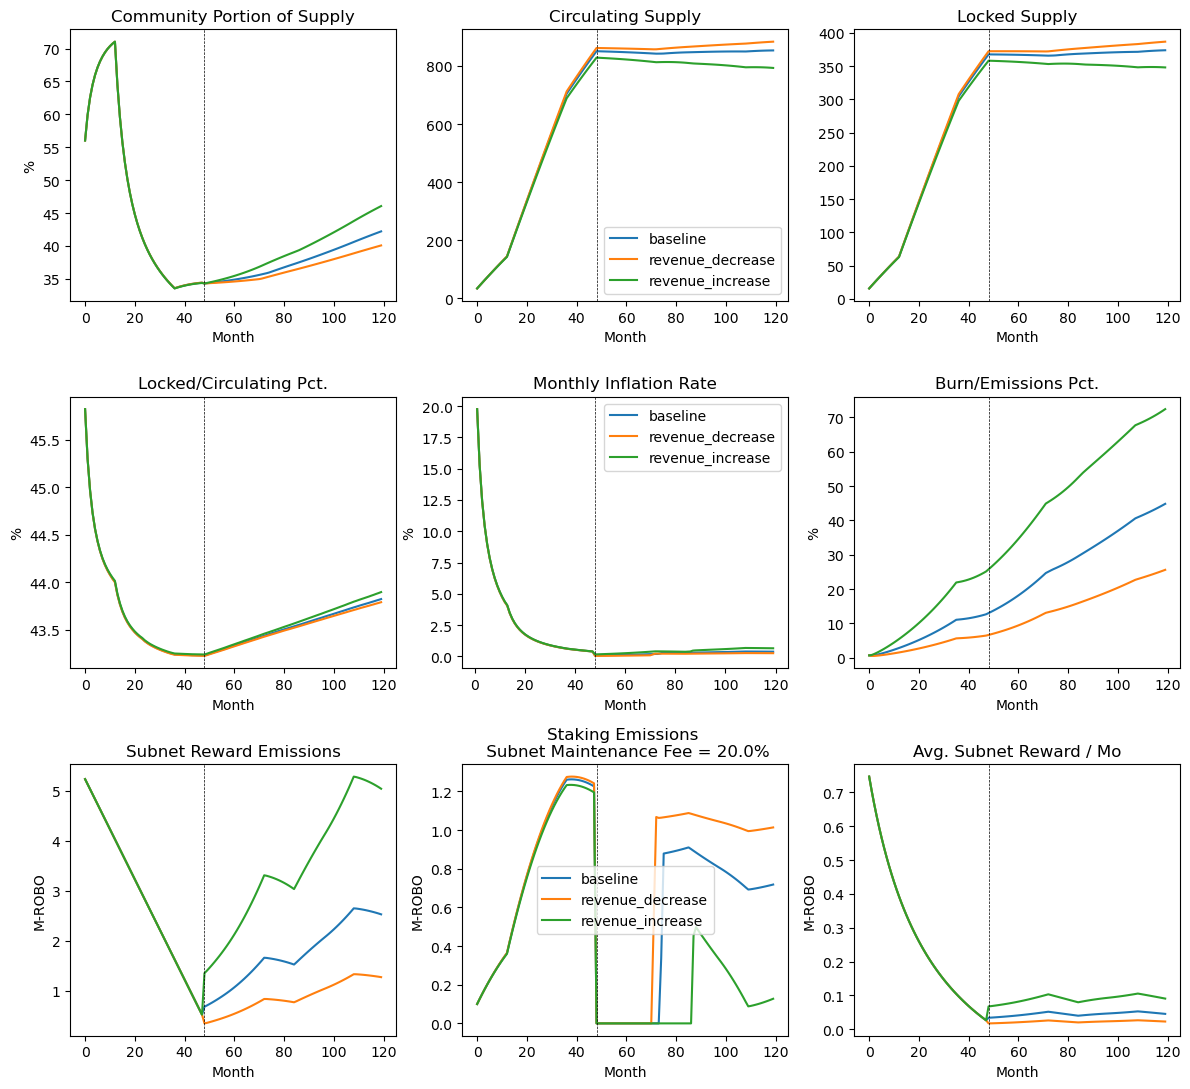

In [8]:
plot_simulation_comparison(
    {
        'baseline': df_baseline,
        'revenue_decrease': df_revenue_decrease,
        'revenue_increase': df_revenue_increase,
    }
)

In [9]:
def plot_simulation(df, foundation_remaining_pct=0.5, foundation_to_community_pct=0.5):
    """
    Plot comparison of multiple simulation runs.
    
    Parameters:
    -----------
    dataframes_dict : dict
        Dictionary where keys are configuration labels (strings) and values are dataframes
        Example: {"Config A": df1, "Config B": df2, "Conservative": df3}
    foundation_remaining_pct : float
        Percentage of foundation tokens remaining (default 0.5)
    foundation_to_community_pct : float  
        Percentage of foundation tokens going to community (default 0.5)
    """
    
    # Create color map for different configurations
    cmap = plt.cm.get_cmap('tab10')
    colors = cmap.colors
    
    fig, ax = plt.subplots(figsize=(10, 7), nrows=2, ncols=3)
    
    # Plot 1: Community Portion of Supply
    axx = ax[0, 0]
    total_supply = df['team_vested'] + df['investor_vested'] + df['foundation_vested'] + df['cumulative_emissions']
    foundation_actual = df['foundation_vested'] * foundation_remaining_pct
    foundation_to_community = df['foundation_vested'] * foundation_to_community_pct
    community_pct = (df['cumulative_emissions'] + foundation_to_community) / total_supply
    axx.plot(df['month'], df['team_vested']/1e6, label='Team')
    axx.plot(df['month'], df['investor_vested']/1e6, label='Investor')
    axx.plot(df['month'], df['foundation_vested']/1e6, label='Foundation & Ecosystem')
    axx.plot(df['month'], df['cumulative_emissions']/1e6, label='Community')
    axx.legend(fontsize=7)
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('M-ROBO')
    axx.set_title('Supply Components')
    
    # Plot 2: Circulating Supply
    axx = ax[0, 1]
    axx.plot(df['month'], df['circulating_supply']/1e6, label='Circulating Supply')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_title('Circulating Supply')
    # axx.legend()
    
    # Plot 4: Locked/Circulating Percentage
    axx = ax[0, 2]
    axx.plot(df['month'], df['total_locked_supply']/df['circulating_supply']*100, label='Locked/Circulating Pct.')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Locked/Circulating Pct.')
    

    # Plot 5: Inflation Rate
    axx = ax[1, 0]
    axx.plot(df['month'], df['total_emissions']/df['circulating_supply'].shift(1)*100, label='Monthly Inflation Rate')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Monthly Inflation Rate')
    # axx.legend()

    # Plot 6: Burn/Emissions Percentage
    axx = ax[1, 1]
    axx.plot(df['month'], df['cumulative_burn']/df['cumulative_emissions']*100, label='Burn/Emissions Pct.')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('%')
    axx.set_title('Burn/Emissions Pct.')
    
    # Plot 7: Subnet Reward Emissions
    axx = ax[1, 2]
    axx.plot(df['month'], df['base_emissions']/1e6, label='Subnet Reward Emissions')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5)
    axx.set_xlabel('Month')
    axx.set_ylabel('M-ROBO')
    axx.set_title('Subnet Reward Emissions')
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_4027959/4277906536.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


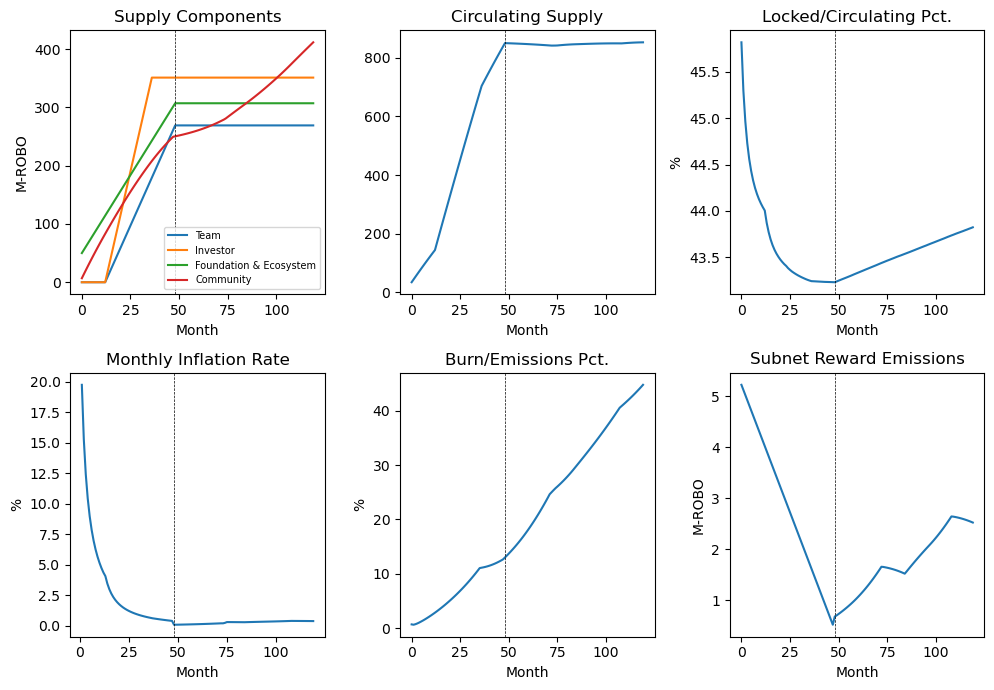

In [10]:
plot_simulation(df_baseline)

In [11]:
import robo_supply_model

robo_supply_model.print_yearly_subnet_rewards(df_baseline)

Total Subnet Rewards by Year:
Year 1: 56,120,890 ROBO (56.12M ROBO)
Year 2: 41,706,963 ROBO (41.71M ROBO)
Year 3: 27,293,037 ROBO (27.29M ROBO)
Year 4: 12,879,110 ROBO (12.88M ROBO)
Year 5: 10,138,101 ROBO (10.14M ROBO)
Year 6: 15,852,099 ROBO (15.85M ROBO)
Year 7: 19,321,082 ROBO (19.32M ROBO)
Year 8: 21,276,769 ROBO (21.28M ROBO)
Year 9: 27,690,999 ROBO (27.69M ROBO)
Year 10: 31,155,977 ROBO (31.16M ROBO)

Total Subnet Rewards by Year (USD):
Year 1: $16,836,267 (avg price: $0.30)
Year 2: $12,512,089 (avg price: $0.30)
Year 3: $8,187,911 (avg price: $0.30)
Year 4: $3,863,733 (avg price: $0.30)
Year 5: $3,041,430 (avg price: $0.30)
Year 6: $4,755,630 (avg price: $0.30)
Year 7: $5,796,325 (avg price: $0.30)
Year 8: $6,383,031 (avg price: $0.30)
Year 9: $8,307,300 (avg price: $0.30)
Year 10: $9,346,793 (avg price: $0.30)

Average Per-Subnet Rewards by Year:
Year 1: 6,610,559 ROBO ($1,983,168) per subnet (avg 8.5 subnets)
Year 2: 3,552,678 ROBO ($1,065,803) per subnet (avg 11.7 subnets)
Y

year
1     5.612089e+07
2     4.170696e+07
3     2.729304e+07
4     1.287911e+07
5     1.013810e+07
6     1.585210e+07
7     1.932108e+07
8     2.127677e+07
9     2.769100e+07
10    3.115598e+07
Name: base_emissions, dtype: float64

In [12]:
robo_supply_model.print_yearly_emissions_percentage(df_baseline)

Emissions as % of Total Supply by Year:
Year 1: 77,125,971 ROBO / 1,000,000,000 ROBO = 7.71%
Year 2: 67,625,218 ROBO / 1,067,625,218 ROBO = 6.33%
Year 3: 58,703,819 ROBO / 1,126,329,037 ROBO = 5.21%
Year 4: 46,149,844 ROBO / 1,172,478,881 ROBO = 3.94%
Year 5: 10,138,101 ROBO / 1,182,616,982 ROBO = 0.86%
Year 6: 15,852,099 ROBO / 1,198,469,081 ROBO = 1.32%
Year 7: 27,672,868 ROBO / 1,226,141,949 ROBO = 2.26%
Year 8: 31,720,874 ROBO / 1,257,862,823 ROBO = 2.52%
Year 9: 36,912,162 ROBO / 1,294,774,984 ROBO = 2.85%
Year 10: 39,606,108 ROBO / 1,334,381,093 ROBO = 2.97%
